In [2]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import scipy.optimize as optimize

In [206]:
def linear_fit(x, y, yerr):
    x = np.copy(x)
    y = np.copy(y)
    ystd = np.std(y)
    #https://q.utoronto.ca/courses/363859/files/32966656?module_item_id=6010287
    delta = len(x) * sum(x**2) - sum(x)**2
    m = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta
    b = (sum(y) - m * sum(x)) / len(x)
    
    y_var_2 = ((1/ (len(x) - 2)) * sum((y - (b + m * x))**2))
    m_std = (y_var_2 * (len(x) / delta))**0.5
    b_std = (y_var_2 * (sum(x**2) / delta))**0.5
    
    r_2 = 1 - (len(x)-2) * y_var_2 / sum((y - np.mean(y))**2)
    
    chi_2 = sum((( y - (b + m * x)))**2 / yerr)
    reduced_chi_2 = chi_2 / (2)
    std_residuals = (sum((y - (b + m * x)) ** 2 ) / (len(x) - 2)) ** 0.5
        
    
    return (m, b, m_std, b_std, r_2, chi_2, reduced_chi_2, std_residuals)

In [236]:
c = 3e8 # m/s
e = 1.60e-19 # C
e_radius = 0.3e-9 # m
PLED = 60e-3 # W
A_e = np.pi * e_radius**2 # m^2
A_pc = 3.23 / (100**2) #m^2
J_eV = 1.60e-19 # eV/J
W = 1.60e-19 #J

In [238]:
A_pc, A_e

(0.000323, 2.8274333882308137e-19)

In [239]:
P_e = PLED * A_e / A_pc # W
W / P_e #time to recieve enough energy to overcome the work function

0.0030463435033293153

In [254]:
1 / P_e * 0.13

2475154096455069.0

In [232]:
W / J_eV

1.0

In [228]:
P_e

5.252198244391604e-17

In [109]:
x[1]

-1.0029745780496016

In [110]:
-x[1] / (P_e / J_eV) # seconds needed for led to emit enough eV to overcome the work function

0.0030554050898458653

In [100]:
h = x[0] * e
h

4.753122479044866e-34

In [99]:
E_o = x[1] * e * -1
E_o

1.6069424334470808e-19

In [101]:
f_o = x[1] * e / h * -1
f_o

338081427636595.1

In [185]:
#Part 1
wavelength = np.array([505, 640, 455, 390, 535, 590, 615])
w_error = np.array([30, 10, 40, 40, 30, 10, 10]) / 2
frequency = c / (wavelength * 1e-9)
f_error = (c / ((wavelength * 1e-9) ** 2)) * (w_error * 1e-9)
vstop = np.array([0.741770, 0.384780, 0.991437, 1.24786, 0.718135, 0.496968, 0.408501])
v_error = np.add(0.005, vstop * 0.002 / 100 + 0.0006 * 0.000001)

In [222]:
np.max(vstop * 0.002 / 100 + 0.0006 * 0.000001)

2.49578e-05

In [219]:
w_ir = 935
w_ir_error = 10 / 2
f_ir = c / (w_ir * 1e-9) / 10 **14
f_ir_error = (c / ((w_ir * 1e-9) ** 2)) * (w_ir_error * 1e-9) / 10**14
f_ir, f_ir_error

(3.20855614973262, 0.01715805427664503)

In [3]:
plt.style.use('science')
plt.rcParams['figure.dpi']=220

In [192]:
def linear_f(x, m, b):
    return m * x + b

param, cov = optimize.curve_fit(linear_f, frequency, vstop)
m_err = np.sqrt(cov[0][0])
b_err = np.sqrt(cov[1][1])
chi_2 = np.sum(((vstop - linear_f(frequency, *param)) / sigma_y) ** 2)
chi_2_2 = np.sum(((vstop - linear_f(frequency, *param))) ** 2 / sum((vstop - linear_f(frequency, *param))**2 / len(vstop)))
param, m_err, b_err, chi_2, chi_2_2

(array([ 2.96666571e-15, -1.00297458e+00]),
 1.4707601809477797e-16,
 0.08629843424955566,
 3.161288719553389,
 7.000000000000001)

In [186]:
sigma_y = np.sqrt((np.mean(f_error) * param[0])**2 + np.mean(v_error) ** 2)

In [189]:
param[0] * e, m_err * e

(4.746665135697396e-34, 2.3532163567405913e-35)

In [201]:
np.std(vstop), sigma_y

(0.2955802901189041, 0.048461674942112634)

In [217]:
m = x[0]
b = -x[1]
h = x[0] * e
dh = e * x[2]
db = x[3]
f_e1 = np.sqrt((e * b / h**2 * dh) ** 2 + (e/h * db) ** 2) / 10**14
f_e2 = np.sqrt((b / x[0]**2 * x[2]) ** 2 + (1 / x[0] * db) ** 2) / 10**14
f_e1, f_e2

(0.33572543018070056, 0.33572543018070045)

In [207]:
x = linear_fit(frequency, vstop, sigma_y)
x, x[0] * e, x[2] * e

((2.966665708498197e-15,
  -1.0029745780496016,
  1.4707602313416665e-16,
  0.08629843609134066,
  0.9878601863578601,
  0.15320134632516455,
  0.07660067316258228,
  0.03853412473718366),
 4.746665133597115e-34,
 2.3532163701466664e-35)

In [209]:
#maximizing slope
x2 = linear_fit(frequency - f_error, vstop + v_error, sigma_y)
x2, x2[0] * e, x2[2] * e

((3.3970100582979576e-15,
  -1.19165370681045,
  1.9206560133356471e-16,
  0.10922513798525292,
  0.984267823600481,
  0.19854398796147416,
  0.09927199398073708,
  0.04386746905464158),
 5.435216093276732e-34,
 3.0730496213370353e-35)

In [210]:
#minimizing slope
x3 = linear_fit(frequency + f_error, vstop - v_error, sigma_y)
x3, x3[0] * e, x3[2] * e

((2.631552435120792e-15,
  -0.8569348254490425,
  1.178704424362154e-16,
  0.07131207198151938,
  0.9900683602581619,
  0.12532974257283055,
  0.06266487128641528,
  0.034853089519132074),
 4.210483896193267e-34,
 1.8859270789794462e-35)

In [158]:
(x2[0] - x3[0]) / 2 * e, (x2[2] + x3[2]) / 2 * e

(6.123660985417499e-35, 6.415805923871941e-35)

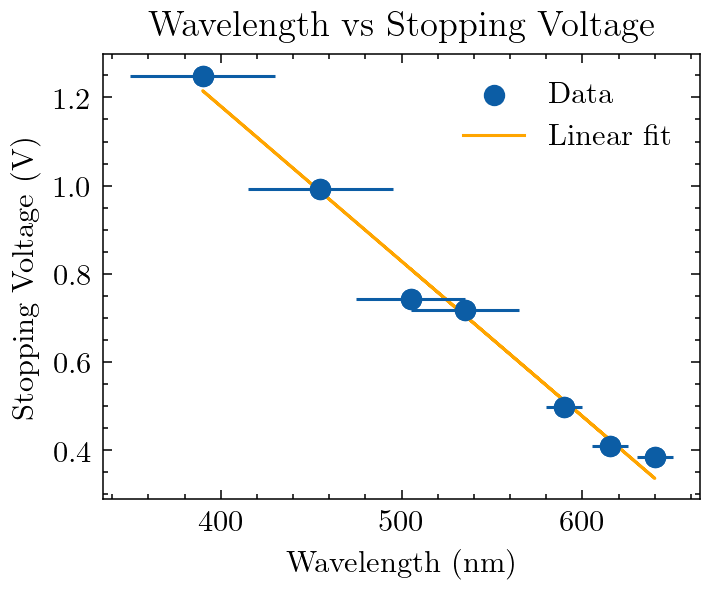

In [38]:
plt.figure()
plt.scatter(wavelength, vstop, label='Data')
plt.plot(wavelength, x[0] * wavelength + x[1], color="orange", label='Linear fit')
plt.errorbar(wavelength, vstop, xerr=w_error, yerr=v_error, fmt='o')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Stopping Voltage (V)')
plt.title('Wavelength vs Stopping Voltage')
plt.legend()
plt.savefig('./img/part1.png')
plt.show()

In [54]:
f_error

array([117635.52592883,  24414.0625    , 193213.38002657, 262984.87836949,
       104812.64739279,  28727.37719046,  26439.28878313])

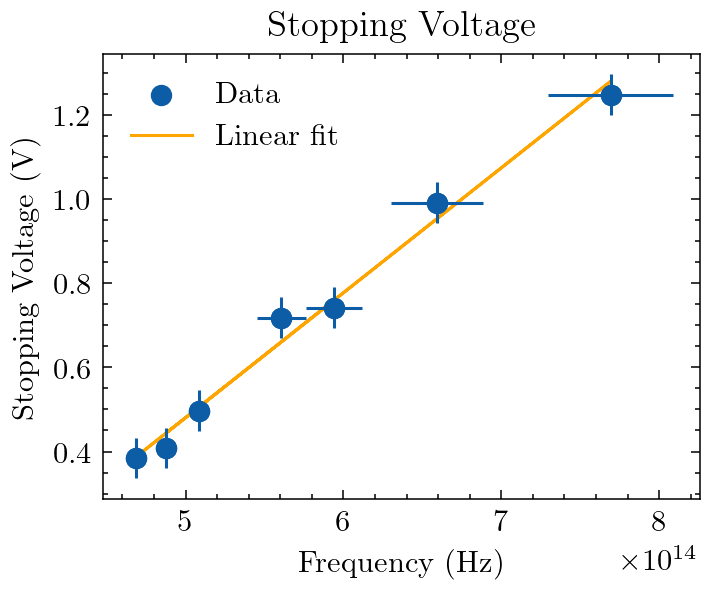

In [188]:
plt.figure()
plt.scatter(frequency, vstop, label='Data', marker='o')
plt.plot(frequency, param[0] * frequency + param[1], color="orange", label='Linear fit')
plt.errorbar(frequency, vstop, xerr=f_error, yerr=sigma_y, fmt='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Stopping Voltage (V)')
plt.title('Stopping Voltage')
plt.legend()
plt.savefig('./img/part1a.png')
plt.show()

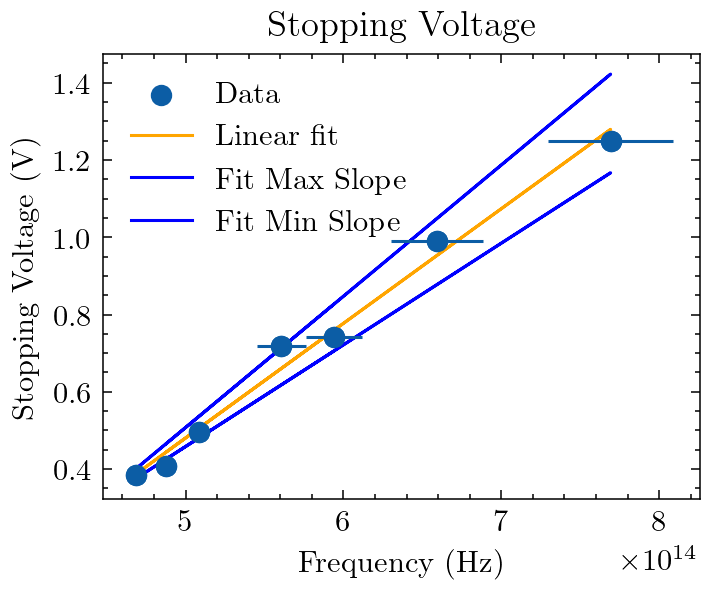

In [161]:
plt.figure()
plt.scatter(frequency, vstop, label='Data', marker='o')
plt.plot(frequency, x[0] * frequency + x[1], color="orange", label='Linear fit')
plt.plot(frequency, x2[0] * frequency + x2[1], color="blue", label='Fit Max Slope')
plt.plot(frequency, x3[0] * frequency + x3[1], color="blue", label='Fit Min Slope')
plt.errorbar(frequency, vstop, xerr=f_error, yerr=v_error, fmt='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Stopping Voltage (V)')
plt.title('Stopping Voltage')
plt.legend()
plt.savefig('./img/part1ab.png')
plt.show()

In [82]:
V = [0.85, 3.86, 5.14, 5.7, 6.03, 6.27, 6.35, 6.43, 6.5, 6.51, 6.51, 6.51, 6.51]
V_ERR = [0.05, 0.05, 0.02, 0.025, 0.05, 0.04, 0.05, 0.025, 0.04, 0.015, 0.02, 0.025, 0.03]
T = [484, 501.5, 519, 535.5, 552, 569, 586, 603.5, 620.5, 655, 689, 722.5, 735]
T_ERR = [5*10**-6] * len(T)

In [85]:
len(V)

13

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


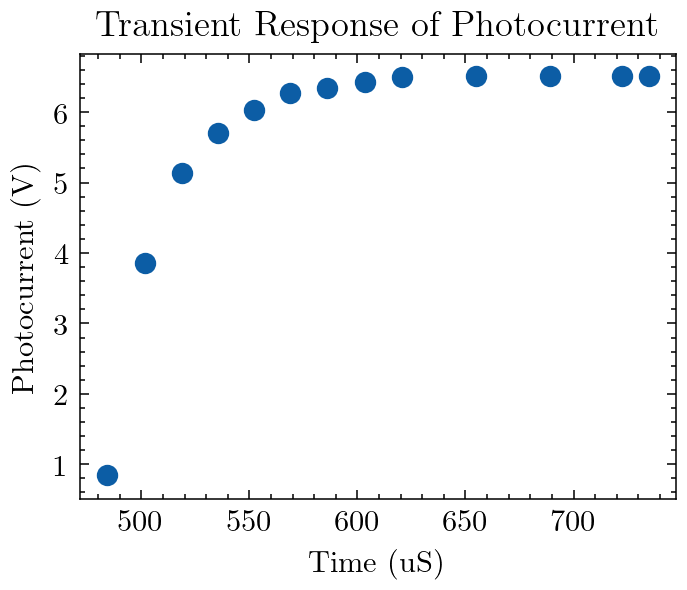

In [87]:
plt.figure()
# plt.scatter(frequency, vstop, label='Data', marker='o')
plt.errorbar(T, V, xerr=T_ERR, yerr=V_ERR, fmt='o')
plt.xlabel('Time (uS)')
plt.ylabel('Photocurrent (V)')
plt.title('Transient Response of Photocurrent')
plt.legend()
plt.savefig('./img/part3.png')
plt.show()

In [250]:
V_stop = [0.956822, 0.955781, 0.954310, 0.953352]
V_stop_err = v_error
photocurrent = [2.8082, 2.9041, 3.10252, 3.35236]
photocurrent_err = [0.0502873466, 0.0502870343, 0.050286593, 0.0502863056]
intensity = np.array([1, 2, 3, 4])

In [248]:
vstop_fit = linear_fit(intensity, V_stop, [0.005] * 4)
photo_fit = linear_fit(intensity, photocurrent, photocurrent_err)